D: [1.851e+05 3.332e+03 9.918e+01 2.236e+01 9.325e-13 1.035e-15]
V: [[-4.956e-05 -1.973e-04 -9.950e-02  3.200e-04  9.950e-01 -7.788e-04]
 [ 2.075e-02  6.236e-04  2.864e-03  8.942e-01  3.500e-04  4.472e-01]
 [ 6.427e-03  1.000e+00 -1.989e-03 -8.402e-04  9.714e-17 -1.101e-17]
 [ 9.997e-01 -6.446e-03 -5.597e-04 -2.320e-02  2.109e-15 -8.392e-17]
 [-4.956e-04 -1.973e-03 -9.950e-01  3.200e-03 -9.950e-02  7.788e-05]
 [-1.038e-02 -3.118e-04 -1.432e-03 -4.471e-01  7.001e-04  8.944e-01]]


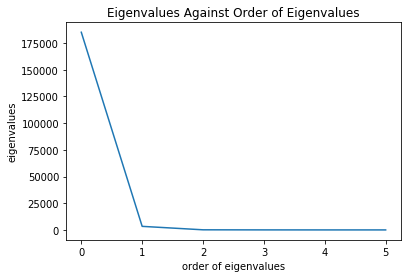

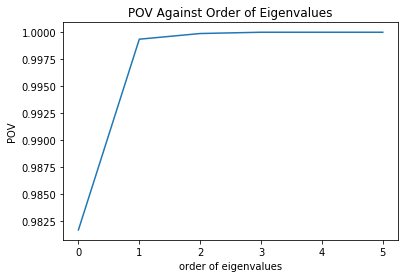

In [57]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def create_data(x1, x2, x3):
    x4 = np.multiply(x2, x2)
    x5 = 10 * x1 + 10
    x6 = -1 * x2 / 2
    X = np.hstack((x1, x2, x3, x4, x5, x6))
    return X

def pca(X):
    '''
    # PCA step by step
    #   1. normalize matrix X
    #   2. compute the covariance matrix of the normalized matrix X
    #   3. do the eigenvalue decomposition on the covariance matrix
    # If you do not remember Eigenvalue Decomposition, please review the linear
    # algebra
    # In this assignment, we use the ``unbiased estimator'' of covariance. You
    # can refer to this website for more information
    # http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.cov.html
    # Actually, Singular Value Decomposition (SVD) is another way to do the
    # PCA, if you are interested, you can google SVD.
    # YOUR CODE HERE!
    '''

    ####################################################################
    # here V is the matrix containing all the eigenvectors, D is the
    # column vector containing all the corresponding eigenvalues.
    mean, sd = np.zeros((1,6)), np.zeros((1,6))
    for i in X:
        mean += i
    mean = mean / X.shape[0]
    X = X - mean
    pca = PCA()
    pca.fit(X)
    #print(pca.explained_variance_,"\n\n")
    cov = np.cov(X.T)
    #D, V = np.linalg.eig(cov)
    V,D,VT = np.linalg.svd(cov) #use svd instead which dont have the float error(neg eig values)
    #print("D:",D)
    #print("V:",V)
    return [V, D]

def main():
    N = 1000
    shape = (N, 1)
    x1 = np.random.normal(0, 1, shape) # samples from normal distribution
    x2 = np.random.exponential(10.0, shape) # samples from exponential distribution
    x3 = np.random.uniform(-100, 100, shape) # uniformly sampled data points
    X = create_data(x1, x2, x3)
    
    V,D = pca(X)
    plt.plot(list(D))
    plt.xlabel('order of eigenvalues')
    plt.ylabel('eigenvalues')
    plt.title('Eigenvalues Against Order of Eigenvalues')
    plt.show()
    POV = []
    add = 0
    for i in D:
        add += i
        POV.append(add/D.sum())
    plt.plot(POV)
    plt.xlabel('order of eigenvalues')
    plt.ylabel('POV')
    plt.title('POV Against Order of Eigenvalues')
    plt.show()
    ####################################################################
    # Use the definition in the lecture notes,
    #   1. perform PCA on matrix X
    #   2. plot the eigenvalues against the order of eigenvalues,
    #   3. plot POV v.s. the order of eigenvalues
    # YOUR CODE HERE!

    ####################################################################


if __name__ == '__main__':
    main()



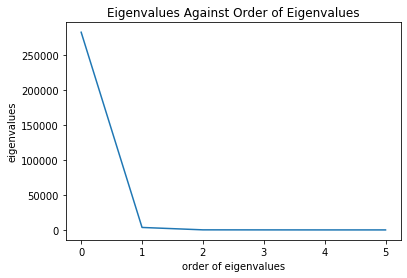

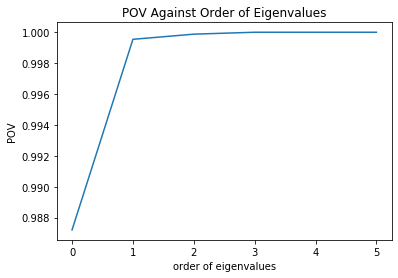

In [35]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def create_data(x1, x2, x3):
    x4 = np.multiply(x2, x2)
    x5 = 10 * x1 + 10
    x6 = -1 * x2 / 2
    X = np.hstack((x1, x2, x3, x4, x5, x6))
    return X

def pca(X):
    '''
    # PCA step by step
    #   1. normalize matrix X
    #   2. compute the covariance matrix of the normalized matrix X
    #   3. do the eigenvalue decomposition on the covariance matrix
    # If you do not remember Eigenvalue Decomposition, please review the linear
    # algebra
    # In this assignment, we use the ``unbiased estimator'' of covariance. You
    # can refer to this website for more information
    # http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.cov.html
    # Actually, Singular Value Decomposition (SVD) is another way to do the
    # PCA, if you are interested, you can google SVD.
    # YOUR CODE HERE!
    '''

    ####################################################################
    # here V is the matrix containing all the eigenvectors, D is the
    # column vector containing all the corresponding eigenvalues.
    mean, sd = np.zeros((1,6)), np.zeros((1,6))
    for i in X:
        mean += i
    mean = mean / X.shape[0]
    X = X - mean
    pca = PCA()
    pca.fit(X)
    #print(pca.explained_variance_,"\n\n")
    cov = np.cov(X.T)
    #D, V = np.linalg.eig(cov)
    Td, Tv = np.linalg.eigh(cov) 
    #print("D:",D)
    #print("V:",V)
    Tv = Tv.T
    idx = np.argsort(Td)[::-1]
    V = Tv[idx]
    D = Td[idx]
    return [V, D]

def main():
    N = 1000
    shape = (N, 1)
    x1 = np.random.normal(0, 1, shape) # samples from normal distribution
    x2 = np.random.exponential(10.0, shape) # samples from exponential distribution
    x3 = np.random.uniform(-100, 100, shape) # uniformly sampled data points
    X = create_data(x1, x2, x3)
    
    V,D = pca(X)
    plt.plot(D)
    plt.xlabel('order of eigenvalues')
    plt.ylabel('eigenvalues')
    plt.title('Eigenvalues Against Order of Eigenvalues')
    plt.show()
    POV = []
    add = 0
    for i in D:
        add += i
        POV.append(add/sum(D))
    plt.plot(POV)
    plt.xlabel('order of eigenvalues')
    plt.ylabel('POV')
    plt.title('POV Against Order of Eigenvalues')
    plt.show()
    ####################################################################
    # Use the definition in the lecture notes,
    #   1. perform PCA on matrix X
    #   2. plot the eigenvalues against the order of eigenvalues,
    #   3. plot POV v.s. the order of eigenvalues
    # YOUR CODE HERE!

    ####################################################################


if __name__ == '__main__':
    main()



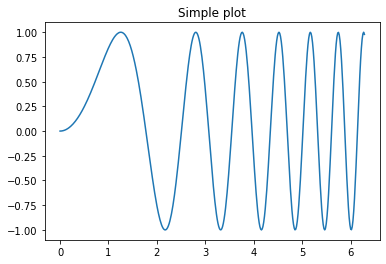

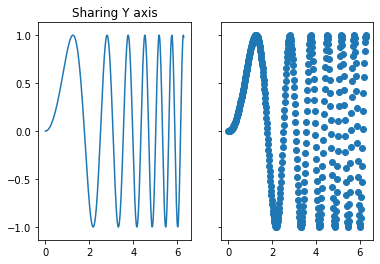

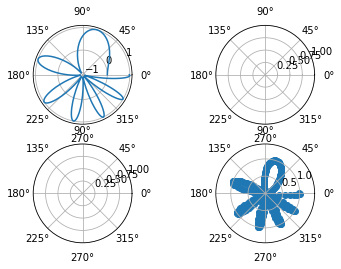

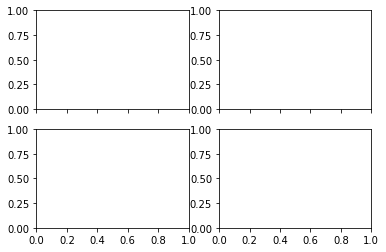

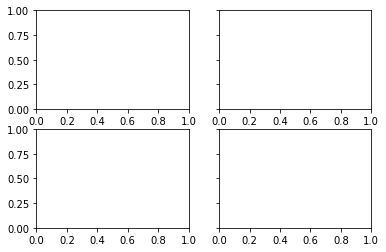

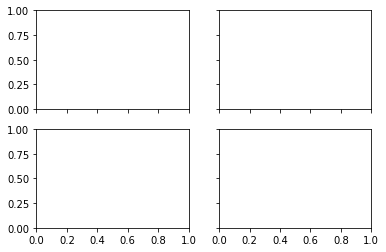

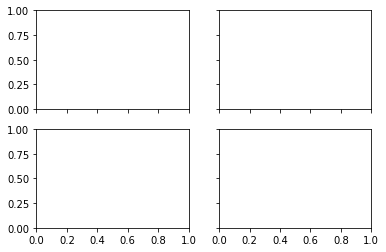

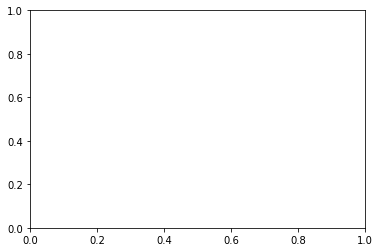

In [36]:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# Creates just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

# Creates two subplots and unpacks the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

# Creates four polar axes, and accesses them through the returned array
fig, axes = plt.subplots(2, 2, subplot_kw=dict(polar=True))
axes[0, 0].plot(x, y)
axes[1, 1].scatter(x, y)

# Share a X axis with each column of subplots
plt.subplots(2, 2, sharex='col')

# Share a Y axis with each row of subplots
plt.subplots(2, 2, sharey='row')

# Share both X and Y axes with all subplots
plt.subplots(2, 2, sharex='all', sharey='all')

# Note that this is the same as
plt.subplots(2, 2, sharex=True, sharey=True)

# Creates figure number 10 with a single subplot
# and clears it if it already exists.
fig, ax=plt.subplots(num=10, clear=True)

We will load 1500 images

Reading images of digit 0



Reading images of digit 1



Reading images of digit 2




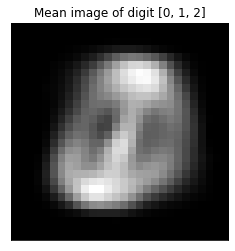

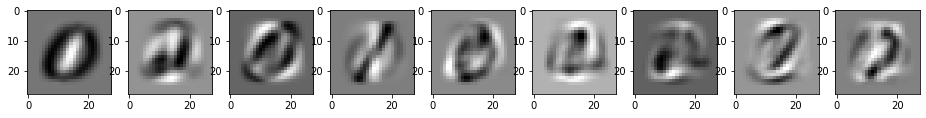

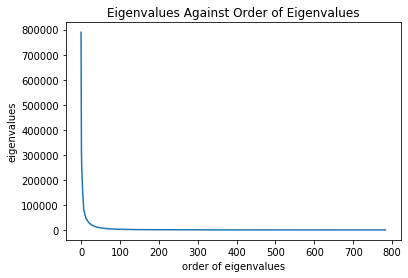

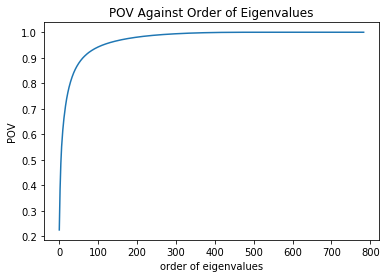

112 dimensions are needed to preserve 0.95 POV.
At 112 ,it attained 0.9501004664673894 POV.


<Figure size 432x288 with 0 Axes>

In [26]:
import os.path
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def load_data(digits = [0], num = 200):
    '''
    Loads all of the images into a data-array.

    The training data has 5000 images per digit,
    but loading that many images from the disk may take a while.  So, you can
    just use a subset of them, say 200 for training (otherwise it will take a
    long time to complete.

    Note that each image as a 28x28 grayscale image, loaded as an array and
    then reshaped into a single row-vector.

    Use the function display(row-vector) to visualize an image.

    '''
    totalsize = 0
    for digit in digits:
        totalsize += min([len(next(os.walk('train%d' % digit))[2]), num])
    print('We will load %d images' % totalsize)
    X = np.zeros((totalsize, 784), dtype = np.uint8)   #784=28*28
    for index in range(0, len(digits)):
        digit = digits[index]
        print('\nReading images of digit %d' % digit)
        for i in range(num):
            pth = os.path.join('train%d' % digit,'%05d.pgm' % i)
            image = plt.imread(pth).reshape((1, 784))
            X[i + index * num, :] = image
        print('\n')
    return X

def plot_mean_image(X, digits = [0]):
    ''' example on presenting vector as an image
    '''
    plt.close('all')
    meanrow = X.mean(0)
    # present the row vector as an image
    plt.imshow(np.reshape(meanrow,(28,28)))
    plt.title('Mean image of digit ' + str(digits))
    plt.gray(), plt.xticks(()), plt.yticks(()), plt.show()

def main():
    digits = [0, 1, 2]
    # load handwritten images of digit 0, 1, 2 into a matrix X
    # for each digit, we just use 500 images
    # each row of matrix X represents an image
    X = load_data(digits, 500)
    # plot the mean image of these images!
    # you will learn how to represent a row vector as an image in this function
    
    plot_mean_image(X, digits)
    ####################################################################
    # plot the eigen images, eigenvalue v.s. the order of eigenvalue, POV
    # v.s. the order of eigenvalue
    # you need to
    #   1. do the PCA on matrix X;
    #
    #   2. plot the eigenimages (reshape the vector to 28*28 matrix then use
    #   the function ``imshow'' in pyplot), save the images of eigenvectors
    #   which correspond to largest 9 eigenvalues. Save them in a single file
    #   ``eigenimages.jpg''.
    #
    #   3. plot the POV (the Portion of variance explained v.s. the number of
    #   components we retain), save the figure in file ``digit_pov.jpg''
    #
    #   4. report how many dimensions are need to preserve 0.95 POV, describe
    #   your answers and your undestanding of the results in the plain text
    #   file ``description.txt''
    #
    #   5. remember to submit file ``eigenimages.jpg'', ``digit_pov.jpg'',
    #   ``description.txt'' and ``ex2.py''.
    # YOUR CODE HERE!

    ####################################################################
    pca = PCA(n_components = 28*28)
    pca.fit(X)
    
    fig, ax = plt.subplots(1, 9, figsize=(16, 2))
    for n in range(9):
        ax[n].imshow(pca.components_[n].reshape(28,28), cmap=plt.cm.gray_r)
    plt.savefig('eigens_fig.png')
    plt.show()
    
    plt.plot(pca.explained_variance_)
    plt.xlabel('order of eigenvalues')
    plt.ylabel('eigenvalues')
    plt.title('Eigenvalues Against Order of Eigenvalues')
    plt.show()
    
    POV = []
    add = 0
    for i in pca.explained_variance_ratio_:
        add += i
        POV.append(add)
    plt.plot(POV)
    plt.xlabel('order of eigenvalues')
    plt.ylabel('POV')
    plt.title('POV Against Order of Eigenvalues')
    plt.show()
    plt.savefig('digit_pov.png')
    
    for i,val in enumerate(POV):
        if val > 0.95:
            print(i,"dimensions are needed to preserve 0.95 POV.")
            print("At",i,",it attained",val,"POV.")
            break
    

if __name__ == '__main__':
    main()


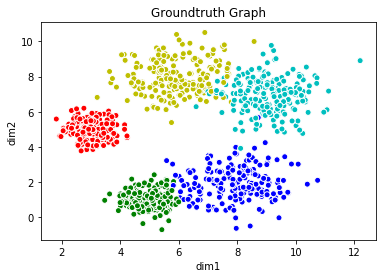

Number of clusters is:  2
Position of the 0 center: [6.0,6.6]
Position of the 1 center: [6.4,1.5]


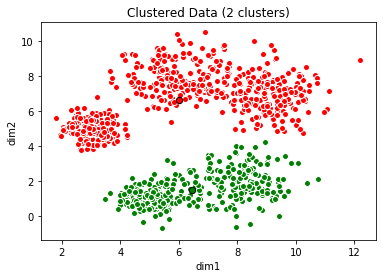

The ARI score is:  0.37094609962406017
The MRI score is:  0.6604200406303891
The v-measure score is:  0.5786940895241612
The average silhouette score is:  0.4772170203984342
Number of clusters is:  3
Position of the 0 center: [6.4,1.5]
Position of the 1 center: [7.7,7.5]
Position of the 2 center: [3.2,5.3]


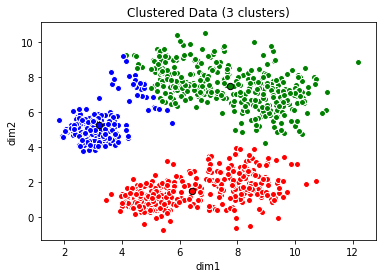

The ARI score is:  0.5788442613623105
The MRI score is:  0.9717252749011026
The v-measure score is:  0.7247768622591967
The average silhouette score is:  0.5659262968991254
Number of clusters is:  4
Position of the 0 center: [9.2,6.9]
Position of the 1 center: [6.4,1.5]
Position of the 2 center: [3.0,5.0]
Position of the 3 center: [6.1,8.0]


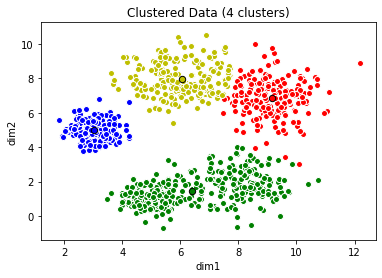

The ARI score is:  0.7335060408187938
The MRI score is:  1.227519470285468
The v-measure score is:  0.8339024797091931
The average silhouette score is:  0.559573799973589
Number of clusters is:  5
Position of the 0 center: [3.0,5.0]
Position of the 1 center: [6.1,8.0]
Position of the 2 center: [5.1,1.1]
Position of the 3 center: [9.2,6.9]
Position of the 4 center: [8.1,2.0]


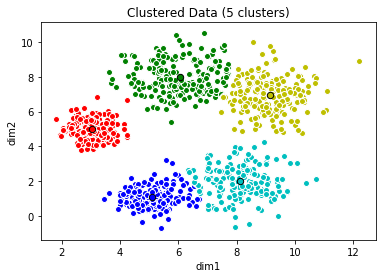

The ARI score is:  0.9000667749267485
The MRI score is:  1.4496428419357763
The v-measure score is:  0.9014773984697726
The average silhouette score is:  0.589129351260557
Number of clusters is:  6
Position of the 0 center: [5.1,1.1]
Position of the 1 center: [9.4,6.7]
Position of the 2 center: [3.0,5.0]
Position of the 3 center: [8.1,2.0]
Position of the 4 center: [7.6,8.0]
Position of the 5 center: [5.4,8.0]


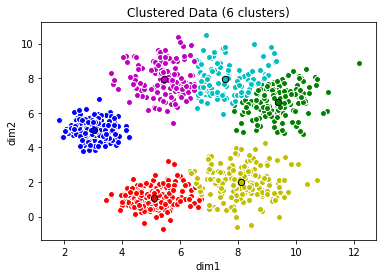

The ARI score is:  0.8029274113297454
The MRI score is:  1.4311428353718312
The v-measure score is:  0.8474289857488919
The average silhouette score is:  0.539182236061707


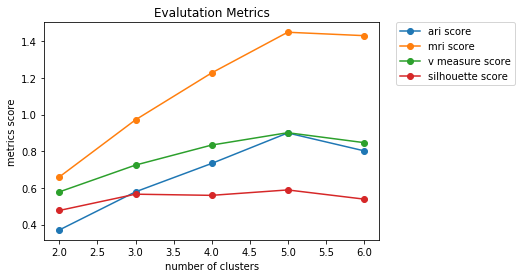

In [124]:
from __future__ import print_function
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import metrics
%matplotlib inline
def create_dataset():
    # Generate sample points
    centers = [[3,5], [5,1], [8,2], [6,8], [9,7]]
    X, y = make_blobs(n_samples=1000,centers=centers,cluster_std=[0.5, 0.5, 1, 1, 1],random_state=3320)
    # =======================================
    # Complete the code here.
    # Plot the data points in a scatter plot.
    # Use color to represents the clusters.
    # =======================================
    clabel = []
    for i in y:
        if i == 0: clabel.append('r') #red
        elif i == 1: clabel.append('g') #green
        elif i == 2: clabel.append('b') #blue
        elif i == 3: clabel.append('y') #yellow
        elif i == 4: clabel.append('c') #cyan
    plt.scatter(X[:, 0], X[:, 1], c=clabel, edgecolor = 'w')
    plt.title('Groundtruth Graph')
    plt.xlabel('dim1')
    plt.ylabel('dim2')
    plt.show()
    return [X, y]

def my_clustering(X, y, n_clusters):
    # =======================================
    # Complete the code here.
    # you need to
    #   1. Implement the k-means by yourself
    #   and cluster samples into n_clusters clusters using your own k-means
    #
    #   2. Print out all cluster centers.
    #
    #   3. Plot all clusters formed,
    #   and use different colors to represent clusters defined by k-means.
    #   Draw a marker (e.g., a circle or the cluster id) at each cluster center.
    #
    #   4. Return scores like this: return [score, score, score, score]
    # =======================================
    color = ['r','g','b','y','c','m']   
     
    centers = [[],[]]
    for i in range(n_clusters):
        x1 = np.random.uniform(X.T[0].max(),X.T[0].min()) 
        while(x1 in centers[0]): x1 = np.random.uniform(X.T[0].max(),X.T[0].min()) #prevent diff centroid locates at the same pos
        centers[0].append(x1)
        x2 = np.random.uniform(X.T[1].max(),X.T[1].min())
        while(x2 in centers[1]): x2 = np.random.uniform(X.T[1].max(),X.T[1].min()) #..
        centers[1].append(x2)
    centers = np.asarray(centers).T
    ls,predls = [],[]
    old_centers,centers = list(np.zeros(centers.shape)),list(centers)
    itr=0
    while (np.linalg.norm(np.asarray(old_centers)-np.asarray(centers))>0.001 and itr<200):
        #print('itr:',itr)
        itr+=1
        predls.clear()
        #cluster assignment
        ls.clear()
        for i in range(n_clusters): ls.append([])
        for i in X:
            mini = max(X.T[0].max(), X.T[1].max())
            min_class = -1
            for j in range(n_clusters):
                if np.linalg.norm(i-centers[j])<mini: 
                    mini = np.linalg.norm(i-centers[j])
                    min_class = j
            #print(i,"in class",min_class)
            ls[min_class].append(i)
            predls.append(min_class)

        #centroid adjustment
        old_centers = centers.copy()
        centers.clear()
        for i,val in enumerate(ls):
            #actually can have zero pt be clustered in the class -> T have no data
            h = np.asarray(val).T[0].mean() if len(val)>0 else np.random.uniform(X.T[0].max(),X.T[0].min())
            k = np.asarray(val).T[1].mean() if len(val)>0 else np.random.uniform(X.T[1].max(),X.T[1].min())
            centers.append([h,k])
            #print(i,":",'[',h,k,']')
    for i,val in enumerate(centers):
        print('Position of the {} center: [{:.2},{:.2}]'.format(i,val[0],val[1]))
    for i in range(n_clusters):
        ls[i] = np.asarray(ls[i]).T
        plt.scatter(ls[i][0],ls[i][1], color=color[i], edgecolor = 'w')
        plt.scatter(centers[i][0],centers[i][1], color=color[i], edgecolor = 'k', s = 40)
    plt.title('Clustered Data ({} clusters)'.format(n_clusters))
    plt.xlabel('dim1')
    plt.ylabel('dim2')
    plt.show()
    
    #find the ground truth ls
    return [metrics.adjusted_rand_score(y,predls),
            metrics.mutual_info_score(y,predls),
            metrics.v_measure_score(y,predls),
            metrics.silhouette_score(X,predls)]  # You won't need this line when you are done

def main():
    X, y = create_dataset()
    range_n_clusters = [2, 3, 4, 5, 6]
    ari_score = [None] * len(range_n_clusters)
    mri_score = [None] * len(range_n_clusters)
    v_measure_score = [None] * len(range_n_clusters)
    silhouette_avg = [None] * len(range_n_clusters)
    elbow_score = [None] * len(range_n_clusters)

    for n_clusters in range_n_clusters:
        i = n_clusters - range_n_clusters[0]
        print("Number of clusters is: ", n_clusters)
        # Implement the k-means by yourself in the function my_clustering
        [ari_score[i], mri_score[i], v_measure_score[i], silhouette_avg[i]] = my_clustering(X, y, n_clusters)
        print('The ARI score is: ', ari_score[i])
        print('The MRI score is: ', mri_score[i])
        print('The v-measure score is: ', v_measure_score[i])
        print('The average silhouette score is: ', silhouette_avg[i])
    
    plt.plot(range_n_clusters, ari_score, label="ari score", marker='o')
    plt.plot(range_n_clusters, mri_score, label="mri score", marker='o')
    plt.plot(range_n_clusters, v_measure_score, label="v measure score", marker='o')
    plt.plot(range_n_clusters, silhouette_avg, label="silhouette score", marker='o')
    plt.title('Evalutation Metrics')
    plt.ylabel('metrics score')
    plt.xlabel('number of clusters')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()
    # =======================================
    # Complete the code here.
    # Plot scores of all four evaluation metrics as functions of n_clusters in a single figure.
    # =======================================

if __name__ == '__main__':
    main()



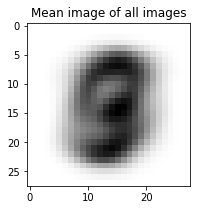

83 dimensions are needed to preserve 0.90 POV.
At 83 ,it attained 0.9007162430339675 POV.
shape: (784, 784)
Number of clusters is:  8


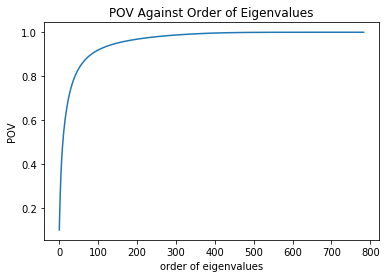

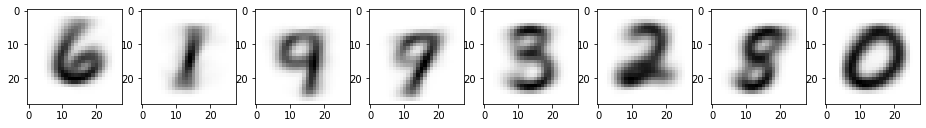

The ARI score is:  0.41666870277975626
The MRI score is:  1.1374070867120383
The v-measure score is:  0.5230275318210543
The average silhouette score is:  0.07537307472169634
Number of clusters is:  9


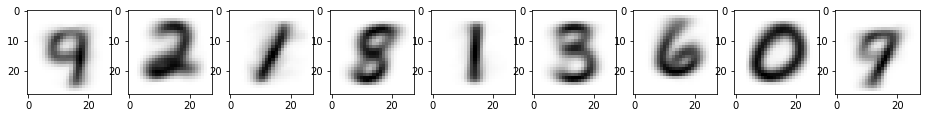

The ARI score is:  0.3917341106230614
The MRI score is:  1.1450898513652812
The v-measure score is:  0.5122454850771719
The average silhouette score is:  0.05925254834322612
Number of clusters is:  10


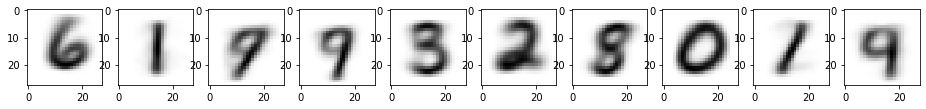

The ARI score is:  0.37950243609642526
The MRI score is:  1.1507685139896235
The v-measure score is:  0.5016141264411855
The average silhouette score is:  0.05874241442315257
Number of clusters is:  11


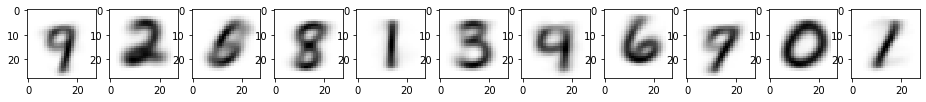

The ARI score is:  0.38425043608753406
The MRI score is:  1.2068165112031668
The v-measure score is:  0.5154290878409992
The average silhouette score is:  0.06139455470161654
Number of clusters is:  12


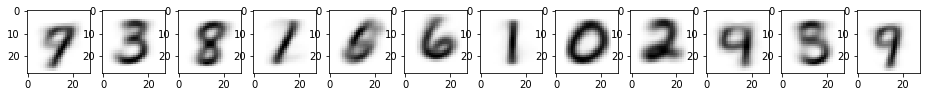

The ARI score is:  0.37802271925408254
The MRI score is:  1.2341889786624247
The v-measure score is:  0.5170794497571223
The average silhouette score is:  0.06349314434265169


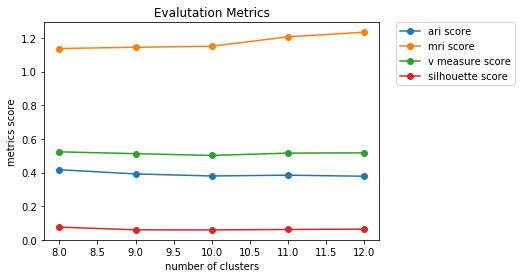

In [40]:
from __future__ import print_function

import os
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from scipy import misc
from struct import unpack

from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

def plot_mean_image(X, log):
    meanrow = X.mean(0)
    # present the row vector as an image
    plt.figure(figsize=(3,3))
    plt.imshow(np.reshape(meanrow,(28,28)), cmap=plt.cm.binary)
    plt.title('Mean image of ' + log)
    plt.show()

def get_labeled_data(imagefile, labelfile):
    """
    Read input-vector (image) and target class (label, 0-9) and return it as list of tuples.
    Adapted from: https://martin-thoma.com/classify-mnist-with-pybrain/
    """
    # Open the images with gzip in read binary mode
    images = open(imagefile, 'rb')
    labels = open(labelfile, 'rb')

    # Read the binary data
    # We have to get big endian unsigned int. So we need '>I'

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)  # skip the magic_number
    N = labels.read(4)
    N = unpack('>I', N)[0]

    if number_of_images != N:
        raise Exception('number of labels did not match the number of images')

    # Get the data
    X = np.zeros((N, rows * cols), dtype=np.uint8)  # Initialize numpy array
    y = np.zeros(N, dtype=np.uint8)  # Initialize numpy array
    for i in range(N):
        for id in range(rows * cols):
            tmp_pixel = images.read(1)  # Just a single byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            X[i][id] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]
    return (X, y)


def my_clustering_mnist(X, y, n_clusters):
    # =======================================
    # Complete the code here.
    # you need to
    #   1. Cluster images into n_clusters clusters using the k-means implemented by yourself or the one provided in scikit-learn.
    #
    #   2. Plot centers of clusters as images and combine these images in a single figure.
    #
    #   3. Return scores like this: return [score, score, score, score]
    # =======================================
    kmeans = KMeans(n_clusters=n_clusters, random_state=2, n_jobs=-1).fit(X)
    fig, ax = plt.subplots(1, n_clusters, figsize=(16, 2))
    for n in range(n_clusters):
        ax[n].imshow(kmeans.cluster_centers_[n].reshape(28,28), cmap=plt.cm.gray_r)
    plt.show()
    #plt.savefig('meanimages.jpg')
    
    #find the ground truth ls
    return [metrics.adjusted_rand_score(y,kmeans.labels_),
            metrics.mutual_info_score(y,kmeans.labels_),
            metrics.v_measure_score(y,kmeans.labels_),
            metrics.silhouette_score(X,kmeans.labels_),]  

def main():
    # Load the dataset
    fname_img = 't10k-images.idx3-ubyte'
    fname_lbl = 't10k-labels.idx1-ubyte'
    [X, y]=get_labeled_data(fname_img, fname_lbl)

    # Plot the mean image
    plot_mean_image(X, 'all images')

    # =======================================
    # Complete the code here.
    # Use PCA to reduce the dimension here.
    # You may want to use the following codes. Feel free to write in your own way.
    # - pca = PCA(n_components=...)
    # - pca.fit(X)
    # - print('We need', pca.n_components_, 'dimensions to preserve 0.9 POV')
    # =======================================

    pca = PCA(n_components = 28*28)
    pca.fit(X)
    
    POV = []
    add, reduced_d = 0, 0
    for i in pca.explained_variance_:
        add += i
        POV.append(add/pca.explained_variance_.sum())
    plt.plot(POV)
    plt.xlabel('order of eigenvalues')
    plt.ylabel('POV')
    plt.title('POV Against Order of Eigenvalues')

    
    for i,val in enumerate(POV):
        if val > 0.90:
            reduced_d = i
            print(i,"dimensions are needed to preserve 0.90 POV.")
            print("At",i,",it attained",val,"POV.")
            break 
    print("shape:",pca.components_.shape)
            
    #pca = PCA(n_components = reduced_d)
    #X = pca.fit(X).transform(X)
    
    # Clustering
    range_n_clusters = [8, 9, 10, 11, 12]
    ari_score = [None] * len(range_n_clusters)
    mri_score = [None] * len(range_n_clusters)
    v_measure_score = [None] * len(range_n_clusters)
    silhouette_avg = [None] * len(range_n_clusters)

    for n_clusters in range_n_clusters:
        i = n_clusters - range_n_clusters[0]
        print("Number of clusters is: ", n_clusters)
        [ari_score[i], mri_score[i], v_measure_score[i], silhouette_avg[i]] = my_clustering_mnist(X, y, n_clusters)
        print('The ARI score is: ', ari_score[i])
        print('The MRI score is: ', mri_score[i])
        print('The v-measure score is: ', v_measure_score[i])
        print('The average silhouette score is: ', silhouette_avg[i])

    # =======================================
    # Complete the code here.
    # Plot scores of all four evaluation metrics as functions of n_clusters in a single figure.
    # =======================================
    plt.plot(range_n_clusters, ari_score, label="ari score", marker='o')
    plt.plot(range_n_clusters, mri_score, label="mri score", marker='o')
    plt.plot(range_n_clusters, v_measure_score, label="v measure score", marker='o')
    plt.plot(range_n_clusters, silhouette_avg, label="silhouette score", marker='o')
    plt.title('Evalutation Metrics')
    plt.ylabel('metrics score')
    plt.xlabel('number of clusters')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()
#     print(ari_score)
#     print(mri_score)
#     print(v_measure_score)
#     print(silhouette_avg)
    
if __name__ == '__main__':
    main()


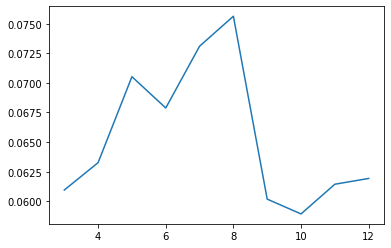

In [135]:
#plot clearer for average silhouette score
index= [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
a=[0.06094940325404807, 0.06326301810145879, 0.07052395378859434, 0.06787929140662351, 0.07309744767693317, 0.07563063840129304, 0.060180391067164614, 0.058931314617966336, 0.061438783180785085, 0.06192695168163136]
plt.plot(index, a)

In [166]:
print(metrics.adjusted_rand_score([0, 0, 1, 1], [0, 0, 1, 1]))
print(metrics.adjusted_rand_score([0, 0, 1, 1], [0, 1, 0, 1]))

1.0
-0.49999999999999994


In [157]:
metrics.homogeneity_score([0, 0, 1, 1], [0, 0, 3, 2])

0.9999999999999999

In [163]:
metrics.mutual_info_score([0, 0, 1, 1], [0, 1, 1, 1])

0.21576155433883565

In [159]:
metrics.completeness_score([0, 0, 1, 1], [0, 0, 1, 2])

0.6666666666666666